In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Update the file path if it's in a specific folder, e.g., '/content/drive/MyDrive/folder_name/Data.csv'
data = pd.read_csv('/content/drive/MyDrive/final_thesis_dataset.csv')

# Display the first few rows to confirm it loaded correctly
data.head()


Mounted at /content/drive


,Timestamp,Gender,Academic year,Name of my University,Religion,Relationship status,CGPA (4.00 Scale),Experience of violence,Residence,Satisfied with result,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Anxiety_sum,Anxiety_level,Anxiety
0,28/06/2024 11:17:51,Male,Graduate (স্নাতক),University of Barishal,Islam,Unmarried,greater than3.50,zero,With family,Both,...,3,2,2,2,3,2,3,74,Mild,Yes
1,28/06/2024 11:22:58,Male,Graduate (স্নাতক),Bu,Islam,Unmarried,3.00 to 3.50,zero,In a hostel/hall/other,Both,...,3,5,3,5,4,5,5,136,Severely Moderate,Yes
2,28/06/2024 11:25:02,Male,Graduate (স্নাতক),CUET,Islam,Unmarried,less than3.00,zero,In a hostel/hall/other,Both,...,3,3,2,3,2,2,1,84,Mild,Yes
3,28/06/2024 12:03:22,Male,Graduate (স্নাতক),university of Barishal,Islam,In a complex relationship,3.00 to 3.50,Verbal,With family,zero,...,5,4,2,5,4,4,2,125,Severely Moderate,Yes
4,28/06/2024 12:12:15,Female,Graduate (স্নাতক),University of Barisal,Islam,Unmarried,3.00 to 3.50,zero,In a hostel/hall/other,zero,...,1,2,2,2,2,2,4,76,Mild,Yes


In [ ]:
# Drop rows with any null values
data_cleaned = data.dropna()

# Display the number of rows remaining after removing null values
remaining_data_count = data_cleaned.shape[0]
print(f"Number of rows after removing null values: {remaining_data_count}")



# Find rows with any null values
rows_with_nulls = data[data.isnull().any(axis=1)]

# Display row indices of rows with null values
print("Indices of rows with null values:")
print(rows_with_nulls.index.tolist())

# Optionally, display the first few columns of rows with null values for context
# You can adjust the column range if needed
rows_with_nulls.iloc[:, :10]


Number of rows after removing null values: 659
Indices of rows with null values:
[]


,Timestamp,Gender,Academic year,Name of my University,Religion,Relationship status,CGPA (4.00 Scale),Experience of violence,Residence,Satisfied with result


#Determining co-relation between Depression level and Socio-demographic variables

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of all categorical columns up to Q1, excluding the Depression_level column itself
categorical_columns = ['Gender', 'Academic year', 'Religion',
                       'Relationship status', 'CGPA (4.00 Scale)', 'Experience of violence',
                       'Residence', 'Satisfied with result']  # Add or modify as needed

# List to store results
results = []

# Perform chi-square test for each categorical variable with Depression_level
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['Depression_level'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Append results as a dictionary
    results.append({
        'Variable': col,
        'Chi-square statistic': chi2,
        'p-value': p,
        'Degrees of freedom': dof,
        'Significant association': 'Yes' if p < 0.05 else 'No'
    })

# Convert results list to a DataFrame for table display
chi_square_results_df = pd.DataFrame(results)

# Display the table
chi_square_results_df


,Variable,Chi-square statistic,p-value,Degrees of freedom,Significant association
0,Gender,147.862544,5.844128e-31,4,Yes
1,Academic year,47.229731,1.365814e-09,4,Yes
2,Religion,5.096152,7.472516e-01,8,No
3,Relationship status,19.632746,1.181848e-02,8,Yes
4,CGPA (4.00 Scale),7.823806,4.508680e-01,8,No
5,Experience of violence,46.296733,8.759043e-05,16,Yes
6,Residence,12.911427,1.171678e-02,4,Yes
7,Satisfied with result,52.077124,6.007636e-07,12,Yes


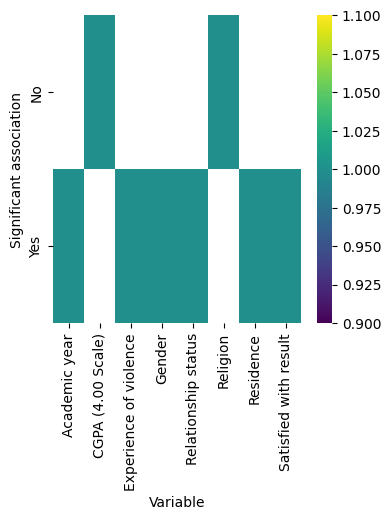

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Significant association'].value_counts()
    for x_label, grp in chi_square_results_df.groupby('Variable')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Variable')
_ = plt.ylabel('Significant association')

#Determining co-relation between Anxiety level and Socio-demographic variables

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of all categorical columns up to Q1, excluding the Depression_level column itself
categorical_columns = ['Gender', 'Academic year', 'Religion',
                       'Relationship status', 'CGPA (4.00 Scale)', 'Experience of violence',
                       'Residence', 'Satisfied with result']  # Add or modify as needed

# List to store results
results = []

# Perform chi-square test for each categorical variable with Depression_level
for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data['Anxiety_level'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Append results as a dictionary
    results.append({
        'Variable': col,
        'Chi-square statistic': chi2,
        'p-value': p,
        'Degrees of freedom': dof,
        'Significant association': 'Yes' if p < 0.05 else 'No'
    })

# Convert results list to a DataFrame for table display
chi_square_results_df = pd.DataFrame(results)

# Display the table
chi_square_results_df




,Variable,Chi-square statistic,p-value,Degrees of freedom,Significant association
0,Gender,10.754079,2.947138e-02,4,Yes
1,Academic year,3.827035,4.299199e-01,4,No
2,Religion,8.792247,3.601239e-01,8,No
3,Relationship status,24.316212,2.027991e-03,8,Yes
4,CGPA (4.00 Scale),17.047492,2.961833e-02,8,Yes
5,Experience of violence,25.917086,5.520612e-02,16,No
6,Residence,4.884653,2.993389e-01,4,No
7,Satisfied with result,54.435850,2.283930e-07,12,Yes


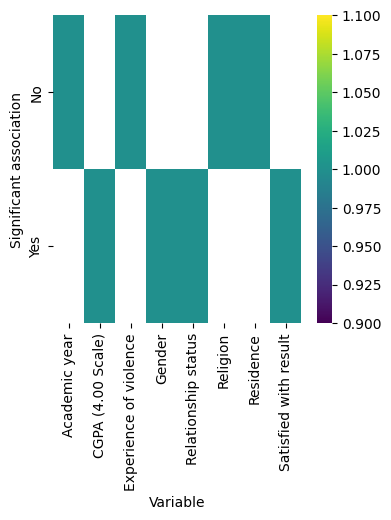

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(4, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['Significant association'].value_counts()
    for x_label, grp in chi_square_results_df.groupby('Variable')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Variable')
_ = plt.ylabel('Significant association')

#Determining co-relation between Depression level and Socio-demographic variables

In [ ]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    'Depression': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Anxiety': ['No', 'Yes', 'Yes', 'No', 'Yes', 'No']
})

# "Yes" এবং "No" কে 1 এবং 0 তে রূপান্তর
data['Depression_numeric'] = data['Depression'].map({'Yes': 1, 'No': 0})
data['Anxiety_numeric'] = data['Anxiety'].map({'Yes': 1, 'No': 0})

# Pearson Correlation
correlation = data['Depression_numeric'].corr(data['Anxiety_numeric'])
print("Pearson Correlation between Depression and Anxiety:", correlation)

Pearson Correlation between Depression and Anxiety: 0.33333333333333326


#Count the number of depression and anxiety

                          Category  Total Yes
0                          Anxiety        638
1                       Depression        577
2            Depression - Moderate        175
3   Depression - Severe Depression        166
4   Depression - Severely Moderate        163
5             Depression - Minimal         82
6                Depression - Mild         73
7               Anxiety - Moderate        231
8      Anxiety - Severely Moderate        172
9         Anxiety - Severe Anxiety        155
10                  Anxiety - Mild         80
11               Anxiety - Minimal         21


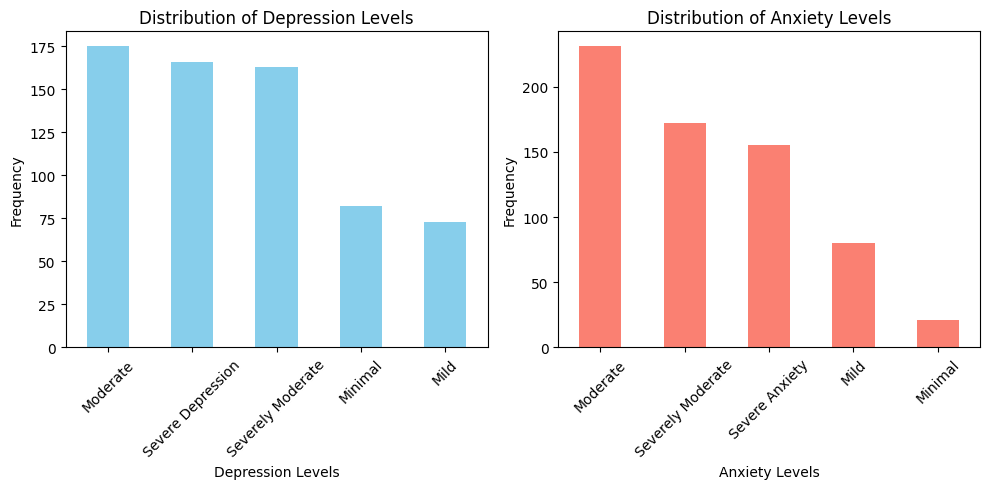

In [ ]:
import pandas as pd

# Assuming 'Anxiety' and 'Depression' columns exist with 'Yes'/'No' values
total_anxiety_yes = data_cleaned[data_cleaned['Anxiety'] == 'Yes'].shape[0]
total_depression_yes = data_cleaned[data_cleaned['Depression'] == 'Yes'].shape[0]

# Count the number of individuals in each class for Depression and Anxiety
depression_counts = data_cleaned['Depression_level'].value_counts()
anxiety_counts = data_cleaned['Anxiety_level'].value_counts()

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Category': ['Anxiety', 'Depression'],
    'Total Yes': [total_anxiety_yes, total_depression_yes]
})

# Create DataFrames for depression level counts
depression_df = pd.DataFrame(depression_counts).reset_index()
depression_df.columns = ['Category', 'Total Yes']
depression_df['Category'] = 'Depression - ' + depression_df['Category']

# Create DataFrames for anxiety level counts
anxiety_df = pd.DataFrame(anxiety_counts).reset_index()
anxiety_df.columns = ['Category', 'Total Yes']
anxiety_df['Category'] = 'Anxiety - ' + anxiety_df['Category']

# Combine all DataFrames
results_df = pd.concat([results_df, depression_df, anxiety_df], ignore_index=True)

# Display the results
print(results_df)

import matplotlib.pyplot as plt

# Plotting histogram for Depression levels
plt.figure(figsize=(10, 5))

# Create subplots
plt.subplot(1, 2, 1)
data_cleaned['Depression_level'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Depression Levels')
plt.xlabel('Depression Levels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Plotting histogram for Anxiety levels
plt.subplot(1, 2, 2)
data_cleaned['Anxiety_level'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Anxiety Levels')
plt.xlabel('Anxiety Levels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
